In [ ]:
from zipfile import ZipFile
zf = ZipFile('/content/drive/MyDrive/cabe.zip', 'r')
zf.extractall('tmp/')
zf.close()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.listdir('tmp/')

['val', 'test', 'train']

In [ ]:
train_dir = 'tmp/train'
validation_dir = 'tmp/val'
test_dir =  'tmp/test'
classes =  ['Healthy', 'leaf curl', 'leaf spot', 'whitefly', 'yellowish']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)
image_validation_gen = ImageDataGenerator(rescale=1./255,)

In [ ]:

train_dataset = image_train_gen.flow_from_directory(train_dir,
                                                     shuffle=True,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode='categorical')
validation_dataset = image_validation_gen.flow_from_directory(validation_dir,
                                                     shuffle=True,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode='categorical')

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

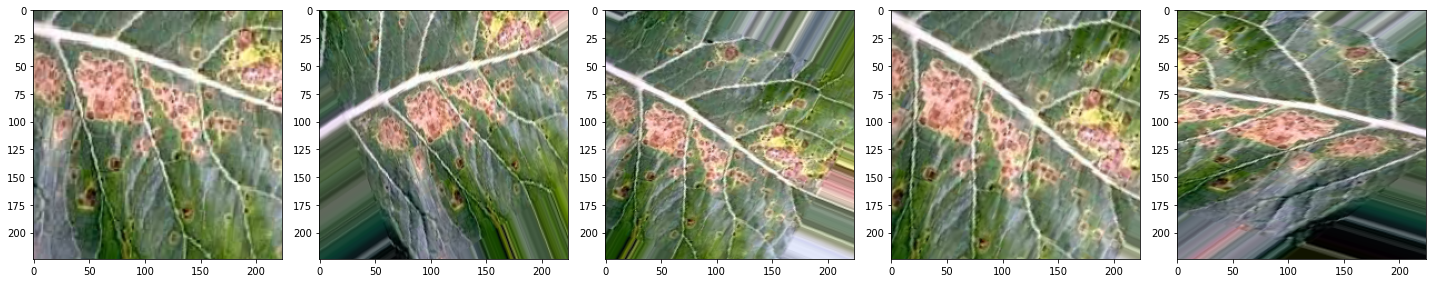

In [ ]:
import matplotlib.pyplot as plt

# Plot a few training images
img_array = [train_dataset[0][0][0] for i in range(5)]
plotImages(img_array)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 as ResModel
#from keras.applications.vgg16 import VGG16 as VGG16Model
img_width, img_height = 224, 224
model = ResModel(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model 
for layer in model.layers:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(5, activation="softmax")(x)

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model_final = Model(inputs = model.input, outputs = predictions)

In [ ]:
import tensorflow as tf
LEARNING_RATE = 0.001 #@param {type:"number"}

model_final.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (224,224,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128,activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5,activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
his=model.fit(train_dataset, validation_data=validation_dataset,epochs=50)

Epoch 1/50
13/13 [==============================] - 26s 2s/step - loss: 1.8159 - accuracy: 0.2125 - val_loss: 1.5706 - val_accuracy: 0.2600
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 1.4956 - accuracy: 0.3275 - val_loss: 1.5251 - val_accuracy: 0.3000
Epoch 3/50
13/13 [==============================] - 23s 2s/step - loss: 1.4433 - accuracy: 0.3900 - val_loss: 1.5319 - val_accuracy: 0.4200
Epoch 4/50
13/13 [==============================] - 25s 2s/step - loss: 1.3428 - accuracy: 0.4500 - val_loss: 1.3154 - val_accuracy: 0.4400
Epoch 5/50
13/13 [==============================] - 22s 2s/step - loss: 1.2992 - accuracy: 0.4400 - val_loss: 1.3997 - val_accuracy: 0.5000
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 1.3011 - accuracy: 0.4700 - val_loss: 1.3057 - val_accuracy: 0.4000
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 1.2129 - accuracy: 0.4825 - val_loss: 1.3263 - val_accuracy: 0.4200
Epoch 8/50
13/13 [==

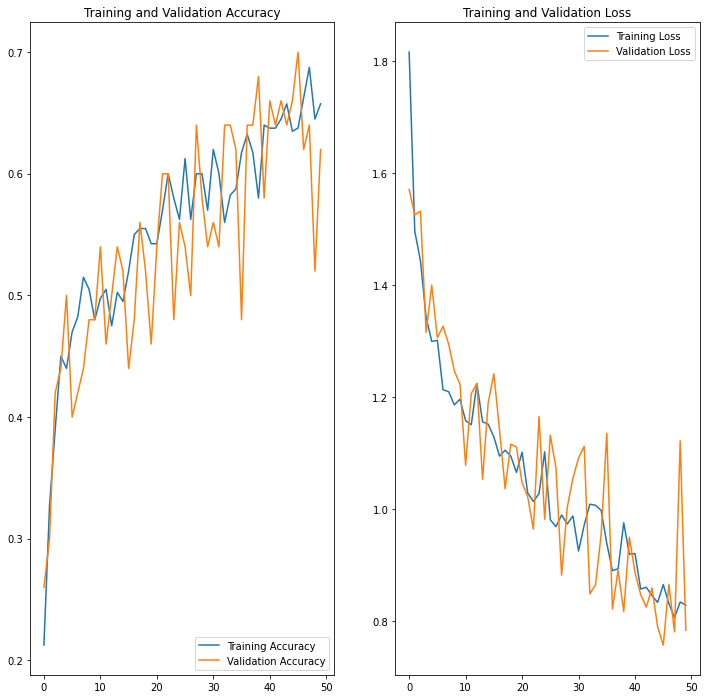

In [ ]:
# Plot training and validation graphs
acc = his.history['accuracy']
val_accuracy = his.history['val_accuracy']

loss = his.history['loss']
val_loss = his.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("cabe.h5")